In [29]:
import pandas as pd 

domain_ewc_csv = pd.read_csv('/net/vast-storage/scratch/vast/kellislab/artliang/magneton/external/proteingym/zero_shot_substitutions_scores_domain_ewc/ESM_C/300M/correlation_summary_esmc_300M.csv')
domain_default_lr_csv = pd.read_csv('/net/vast-storage/scratch/vast/kellislab/artliang/magneton/external/proteingym/zero_shot_substitutions_scores_domain_default_lr/ESM_C/300M/correlation_summary_esmc_300M.csv')
default_csv = pd.read_csv('/net/vast-storage/scratch/vast/kellislab/artliang/magneton/external/proteingym/zero_shot_substitutions_scores_default/ESM_C/300M/correlation_summary_esmc_300M.csv')

In [30]:
ground_truth_csv = pd.read_csv('/net/vast-storage/scratch/vast/kellislab/artliang/magneton/external/proteingym/benchmarks/DMS_zero_shot/substitutions/Spearman/DMS_substitutions_Spearman_DMS_level.csv')

In [31]:
domain_ewc_csv.head()

,assay,correlation
0,A0A140D2T1_ZIKV_Sourisseau_2019,-0.083925
1,A0A192B1T2_9HIV1_Haddox_2018,0.387903
2,A0A1I9GEU1_NEIME_Kennouche_2019,0.005555
3,A0A247D711_LISMN_Stadelmann_2021,0.078034
4,A0A2Z5U3Z0_9INFA_Doud_2016,0.043351


In [32]:
ground_truth_csv['ESM-C (300M)'].head()

0   -0.058
1    0.478
2    0.058
3    0.096
4    0.046
Name: ESM-C (300M), dtype: float64

In [36]:
result = ground_truth_csv[['ESM-C (300M)']].join(domain_ewc_csv['correlation'], rsuffix='_domain_ewc')
result = result.join(domain_default_lr_csv['correlation'], rsuffix='_domain_default_lr')
result = result.join(default_csv['correlation'], rsuffix='_default')

# result.to_csv('correlations.csv', index=False)

In [37]:
result = result.rename(columns={'correlation': 'correlation_domain_ewc'})
result.head()

,ESM-C (300M),correlation_domain_ewc,correlation_domain_default_lr,correlation_default
0,-0.058,-0.083925,-0.078185,-0.059703
1,0.478,0.387903,0.288319,0.479261
2,0.058,0.005555,0.004520,0.058380
3,0.096,0.078034,0.061963,0.093217
4,0.046,0.043351,0.042394,0.049171


                               ESM-C (300M)  correlation_domain_ewc  \
ESM-C (300M)                       1.000000                0.949569   
correlation_domain_ewc             0.949569                1.000000   
correlation_domain_default_lr      0.764704                0.805589   
correlation_default                0.999854                0.949300   

                               correlation_domain_default_lr  \
ESM-C (300M)                                        0.764704   
correlation_domain_ewc                              0.805589   
correlation_domain_default_lr                       1.000000   
correlation_default                                 0.765120   

                               correlation_default  
ESM-C (300M)                              0.999854  
correlation_domain_ewc                    0.949300  
correlation_domain_default_lr             0.765120  
correlation_default                       1.000000  


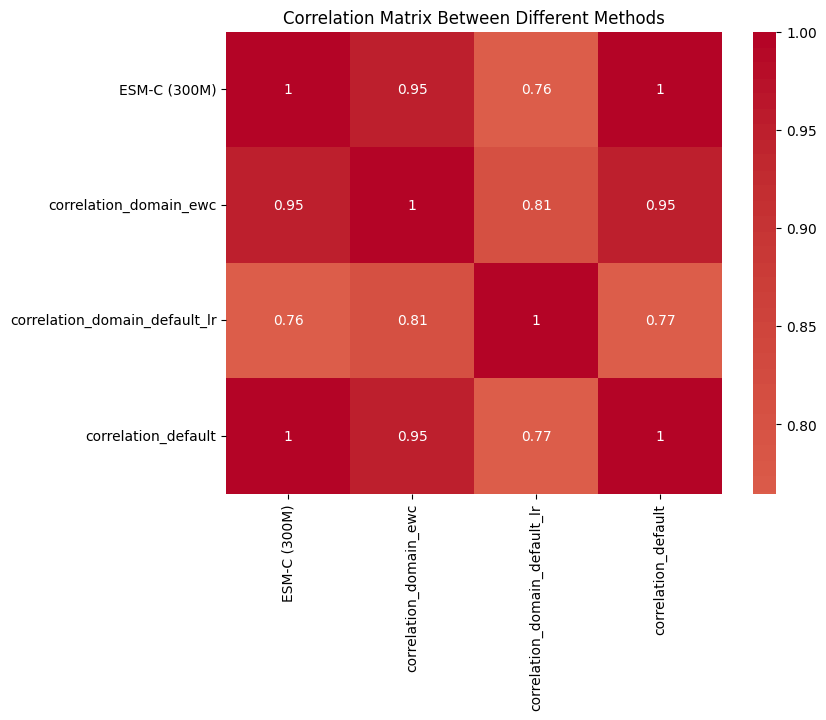

Correlation with ESM-C (300M): correlation_domain_ewc = 0.950
Correlation with ESM-C (300M): correlation_domain_default_lr = 0.765
Correlation with ESM-C (300M): correlation_default = 1.000


In [38]:
# Calculate pairwise correlations between all methods
correlation_matrix = result.corr()
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Between Different Methods')
plt.show()

# Compare each method to ESM-C (300M) baseline
for col in result.columns[1:]:  # Skip ESM-C (300M) column
    corr = result['ESM-C (300M)'].corr(result[col])
    print(f"Correlation with ESM-C (300M): {col} = {corr:.3f}")